In [2]:
import cv2
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%cd e:/Projects/Project1/data plastic renamed

e:\Projects\Project1\data plastic renamed


#问题分析

#目标标识与导入

In [2]:
#初始化 
n=24
target=np.zeros((2,n))
df_target=pd.DataFrame(target,index=["Flash","Short"])

##手动目标设置

In [5]:
i = 0
while -1 < i < n:
    name = '(' + str(i+1) + ')' + '.bmp'  # 图片读取
    img = cv2.imread(name)

    img = cv2.resize(img, (700, 500), 0, 0)  # 合适大小显示
    cv2.imshow("img", img)

    for j in range(2):
        tmp = cv2.waitKey(0)

        if tmp == ord('q'):  # 按q退出
            i = n+1
        if tmp == ord('a'):  # 回到上一个输入
            i -= 1
            break
        elif tmp == ord('d'):
            i += 1
            break

        df_target.iloc[j, i] = tmp-48  # 写入文件  做数组访问使用iloc

    i += 1

cv2.destroyAllWindows()  # 关闭文件 窗口
df_target.to_csv('target.csv')

##读取与显示

In [3]:
df_target = pd.read_csv("target.csv")

i = 0
n = 24
while -1 < i < n:
    name = '(' + str(i+1) + ')' + '.bmp'  # 图片读取
    img = cv2.imread(name)

    img = cv2.resize(img, (700, 500), 0, 0)  # 合适大小显示
    Flash, Short = df_target.iloc[:, i+1]
    tag = "Flash: " + str(Flash) + "   Short:" + str(Short)

    font = cv2.FONT_HERSHEY_SIMPLEX  # 字体对象
    cv2.putText(img, tag, (20, 450), font,
                1, (20, 50, 200), 1, lineType=cv2.LINE_AA)
    cv2.imshow("img", img)

    tmp = cv2.waitKey(0)
    if tmp == ord('q'):  # 按q退出
        i = n
    if tmp == ord('a') and i != 0:  # 查看上一个图片
        i -= 1
    if tmp == ord('d') and i != n-1:
        i += 1 
        
cv2.destroyAllWindows()

#图片处理

##降低分辨率 

In [ ]:
#读取图片 修改像素 
n=24
ims=np.zeros((n))

for i in range(n):
    name = '(' + str(i+1) + ')'  #图片读取 
    ims[i]=cv2.imread(name + '.bmp')
    
    cv2.resize(ims[i],(100,60))
    cv2.imwrite(name + "_.bmp")

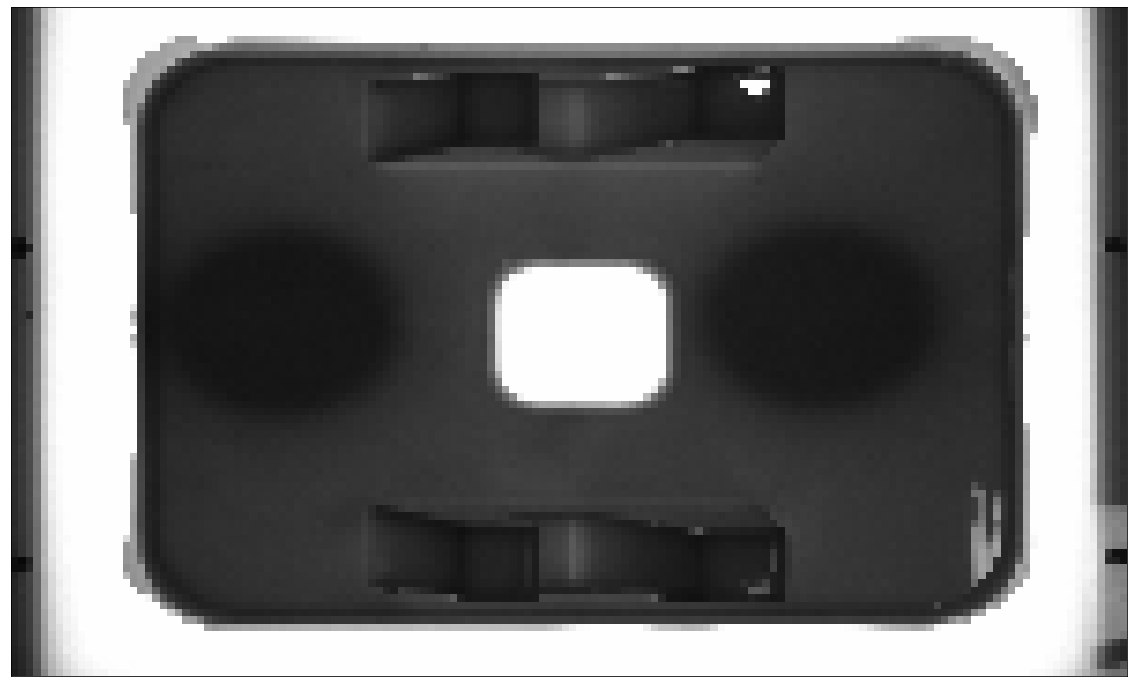

In [6]:
name = '(' + str(0+1) + ')'
img = cv2.imread(name + '.bmp')
img_=cv2.resize(img, (150, 90))

plt.figure(figsize=(20, 16))
plt.xticks([]),plt.yticks([])
plt.imshow(img_);

##阈值分割

#机器学习 